In [2]:
# Installing necesary libraries 

!pip3 install fuzzywuzzy
!pip3 install python-Levenshtein

     |████████████████████████████████| 50 kB 2.6 MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149860 sha256=61967446efbf1cb1cff9f037117c687d8dd68bd36c62298b76ef21662378a77e
  Stored in directory: /root/.cache/pip/wheels/05/5f/ca/7c4367734892581bb5ff896f15027a932c551080b2abd3e00d
Successfully built python-Levenshtein


In [3]:
# Importing all libraries required 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
# Uploading Agoda Hotel's Partners file into seperate dataframes with utf-8 encoding 
partner1 = pd.read_csv('/content/sample_data/Partner1.csv',encoding="utf-8")
partner2 = pd.read_csv('/content/sample_data/Partner2.csv',encoding="utf-8")
#example = pd.read_csv('/content/sample_data/examples.csv',encoding="utf-8")

In [ ]:
# Checking the data quality for partner1
partner1.info()
partner1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   p1.key            10000 non-null  object 
 1   p1.hotel_name     10000 non-null  object 
 2   p1.city_name      10000 non-null  object 
 3   p1.country_code   9995 non-null   object 
 4   p1.hotel_address  9999 non-null   object 
 5   p1.star_rating    10000 non-null  float64
 6   p1.postal_code    8250 non-null   object 
dtypes: float64(1), object(6)
memory usage: 547.0+ KB


,p1.star_rating
count,10000.000000
mean,2.852750
std,1.234806
min,0.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


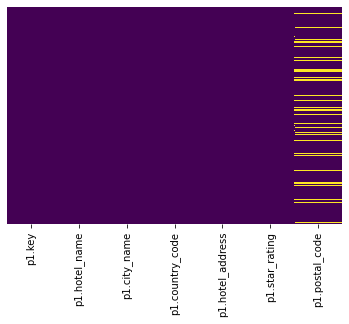

In [ ]:
# Null Value analysis for all columns available in Partner1
sns.heatmap(partner1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
# Checking the data quality for partner2
partner2.info()
partner2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   p2.key            10000 non-null  object 
 1   p2.hotel_name     10000 non-null  object 
 2   p2.city_name      10000 non-null  object 
 3   p2.country_code   9995 non-null   object 
 4   p2.hotel_address  9999 non-null   object 
 5   p2.star_rating    10000 non-null  float64
 6   p2.postal_code    9336 non-null   object 
dtypes: float64(1), object(6)
memory usage: 547.0+ KB


,p2.star_rating
count,10000.00000
mean,2.49311
std,1.54854
min,0.00000
25%,2.00000
50%,3.00000
75%,4.00000
max,5.00000


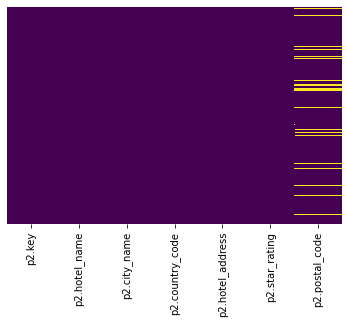

In [ ]:
# Null Value analysis for all columns available in Partner1
sns.heatmap(partner2.isnull(),yticklabels=False,cbar=False,cmap='viridis')
# Observations : 
# 1. Both datasets have similar structure and entries. 
# 2. Partner 2 has lesser postal codes avaialble than partner 1. Directect mapping using postal code will not work in this case. 
# 3. Partner 1 city name also has state in some cases. This is not the case with Partner 2 

In [ ]:
partner1.head()

,p1.key,p1.hotel_name,p1.city_name,p1.country_code,p1.hotel_address,p1.star_rating,p1.postal_code
0,5E876BFEA81A39E42E3019FE17303D52,Elite Grande Hotel,Manama,BH,"Bldg 3378, Road 2845, Area 428",4.0,5458
1,4F315989358CC0F3F7869F569887743D,Quality Inn West Chester,West Chester (OH),US,8567 Cincinnati Dayton Road,3.0,45069
2,A4EEBCBB9932DADE591248DFFFBDC068,MAP5 Village Resort,Goa,IN,Vithaldas Wadoo,3.0,403512
3,2833BE9FD49A063A36D3DE1E5E28ABC4,Hampton Inn & Suites San Jose Hotel,San Jose (CA),US,55 Old Tully Road,3.0,95111
4,F7C20B50AE5C6C807BAABB65B8926F07,Favehotel Daeng Tompo,Makassar,ID,"Daeng Tompo Street number 28, Losari",3.0,NaN


In [ ]:
partner2.head()

,p2.key,p2.hotel_name,p2.city_name,p2.country_code,p2.hotel_address,p2.star_rating,p2.postal_code
0,9494A063EF5C6B311CDD2DDD87D775A9,MGM Luxury Villa,Uluwatu,ID,"Jl. Indraprasta, Br. Giri Darma Bukit Ungasan",2.0,80364
1,4A46417D4D1B9ED3E5B5198D7E31B7CD,The Urban Hotel,Bangalore,IN,"3, Rustam Bagh Road, Off HAL Airport Road, (ne...",3.0,560017
2,76160461BF16DEE6C10ECAACC6B576F5,Hotel Royale Ambience,Raipur,IN,"Shri Guru Gobind Singh Chowk, Fafadih",3.0,492009
3,3ACC6E5C560D54CDA969FCA1714AB3DF,Madu Inn,Jakarta,ID,Jl. Madu No. 36,1.0,11180
4,04AD88AFFF89A2B3299736E9C01B3755,Ron Gong Hotel,Chiayi City,TW,"No. 77, Ximen Street",0.0,700


In [5]:
# Business logic to match the hotel names will be done on hotel_name, city_name+postal_code as a new field and on hotel_address
# To increase the performance of the coden this step we will be removing stopwords and punctuations from hotel_name and hotel_address from both partner 1 and ppartner 2 

partner1_hotel_name = []
partner2_hotel_name = []
partner1_hotel_add = []
partner2_hotel_add = []

for i in range(len(partner1)):
  text = partner1.iloc[i,1]
  nopunc = [c for c in text if c not in string.punctuation]
  nopunc = ''.join(nopunc)
  nopunc.split()
  clean_text = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
  clean_text = ("").join(clean_text)
  partner1_hotel_name.append(clean_text)

for i in range(len(partner2)):
  text = partner2.iloc[i,1]
  nopunc = [c for c in text if c not in string.punctuation]
  nopunc = ''.join(nopunc)
  nopunc.split()
  clean_text = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
  clean_text = ("").join(clean_text)
  partner2_hotel_name.append(clean_text)

for i in range(len(partner1)):
  text = str(partner1.iloc[i,4])
  nopunc = [c for c in text if c not in string.punctuation]
  nopunc = ''.join(nopunc)
  nopunc.split()
  clean_text = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
  clean_text = ("").join(clean_text)
  partner1_hotel_add.append(clean_text)

for i in range(len(partner2)):
  text = str(partner2.iloc[i,4])
  nopunc = [c for c in text if c not in string.punctuation]
  nopunc = ''.join(nopunc)
  nopunc.split()
  clean_text = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
  clean_text = ("").join(clean_text)
  partner2_hotel_add.append(clean_text)

In [6]:
# Adding clean hotel_name and clean_hotel_address for further prcessing 
partner1['p1.clean_hotel_name'] = partner1_hotel_name
partner2['p2.clean_hotel_name'] = partner2_hotel_name
partner1['p1.clean_hotel_add'] = partner1_hotel_add
partner2['p2.clean_hotel_add'] = partner2_hotel_add

In [7]:
# Removing special characters and coverting the string into lower case 
partner1['p1.new_hotel_name'] = partner1['p1.clean_hotel_name'].str.lower()
partner1['p1.new_hotel_name'] = partner1['p1.new_hotel_name'].str.replace(' ','')
partner1['p1.new_hotel_name'] = partner1['p1.new_hotel_name'].str.replace('/','')
partner1['p1.new_hotel_name'] = partner1['p1.new_hotel_name'].str.replace('@','')
partner1['p1.new_hotel_name'] = partner1['p1.new_hotel_name'].str.replace("\\|","")
partner1['p1.new_hotel_name'] = partner1['p1.new_hotel_name'].str.replace("&","")
partner1['p1.new_hotel_name'] = partner1['p1.new_hotel_name'].str.replace("[0-9]","")
partner1['p1.new_hotel_name'] = partner1['p1.new_hotel_name'].str.replace(",","")
partner1['p1.new_hotel_name'] = partner1['p1.new_hotel_name'].str.replace("-","")
partner1['p1.new_hotel_name'] = partner1['p1.new_hotel_name'].str.replace("(","")
partner1['p1.new_hotel_name'] = partner1['p1.new_hotel_name'].str.replace(")","")

partner2['p2.new_hotel_name'] = partner2['p2.clean_hotel_name'].str.lower()
partner2['p2.new_hotel_name'] = partner2['p2.new_hotel_name'].str.replace(' ','')
partner2['p2.new_hotel_name'] = partner2['p2.new_hotel_name'].str.replace('/','')
partner2['p2.new_hotel_name'] = partner2['p2.new_hotel_name'].str.replace('@','')
partner2['p2.new_hotel_name'] = partner2['p2.new_hotel_name'].str.replace("\\|","")
partner2['p2.new_hotel_name'] = partner2['p2.new_hotel_name'].str.replace("&","")
partner2['p2.new_hotel_name'] = partner2['p2.new_hotel_name'].str.replace("[0-9]","")
partner2['p2.new_hotel_name'] = partner2['p2.new_hotel_name'].str.replace(",","")
partner2['p2.new_hotel_name'] = partner2['p2.new_hotel_name'].str.replace("-","")
partner2['p2.new_hotel_name'] = partner2['p2.new_hotel_name'].str.replace("(","")
partner2['p2.new_hotel_name'] = partner2['p2.new_hotel_name'].str.replace(")","")

In [ ]:
partner1['p1.new_hotel_name']

0                    elitegrandehotel
1               qualityinnwestchester
2                    mapvillageresort
3        hamptoninnsuitessanjosehotel
4                 favehoteldaengtompo
                    ...              
9995    bestwesternexecutiveinnsuites
9996                     hotelsolsana
9997    apartmentabbayederoselandnice
9998               hotelnalandaladakh
9999            berjayalangkawiresort
Name: p1.new_hotel_name, Length: 10000, dtype: object

In [ ]:
partner2['p2.new_hotel_name']

0                mgmluxuryvilla
1                    urbanhotel
2           hotelroyaleambience
3                       maduinn
4                  rongonghotel
                 ...           
9995              aamariresorts
9996              tadfaneresort
9997              hotelbluestar
9998     waysgardenhotelleisure
9999    cataloniaplazacatalunya
Name: p2.new_hotel_name, Length: 10000, dtype: object

In [8]:
# Removing special characters and coverting the string into lower case 
partner1['p1.new_hotel_address'] = partner1['p1.clean_hotel_add'].str.lower()
partner1['p1.new_hotel_address'] = partner1['p1.new_hotel_address'].str.replace(' ','')
partner1['p1.new_hotel_address'] = partner1['p1.new_hotel_address'].str.replace('/','')
partner1['p1.new_hotel_address'] = partner1['p1.new_hotel_address'].str.replace('@','')
partner1['p1.new_hotel_address'] = partner1['p1.new_hotel_address'].str.replace("\\|","")
partner1['p1.new_hotel_address'] = partner1['p1.new_hotel_address'].str.replace("&","")
partner1['p1.new_hotel_address'] = partner1['p1.new_hotel_address'].str.replace("[0-9]","")
partner1['p1.new_hotel_address'] = partner1['p1.new_hotel_address'].str.replace(",","")
partner1['p1.new_hotel_address'] = partner1['p1.new_hotel_address'].str.replace("-","")
partner1['p1.new_hotel_address'] = partner1['p1.new_hotel_address'].str.replace("(","")
partner1['p1.new_hotel_address'] = partner1['p1.new_hotel_address'].str.replace(")","")

partner2['p2.new_hotel_address'] = partner2['p2.clean_hotel_add'].str.lower()
partner2['p2.new_hotel_address'] = partner2['p2.new_hotel_address'].str.replace(' ','')
partner2['p2.new_hotel_address'] = partner2['p2.new_hotel_address'].str.replace('/','')
partner2['p2.new_hotel_address'] = partner2['p2.new_hotel_address'].str.replace('@','')
partner2['p2.new_hotel_address'] = partner2['p2.new_hotel_address'].str.replace("\\|","")
partner2['p2.new_hotel_address'] = partner2['p2.new_hotel_address'].str.replace("&","")
partner2['p2.new_hotel_address'] = partner2['p2.new_hotel_address'].str.replace("[0-9]","")
partner2['p2.new_hotel_address'] = partner2['p2.new_hotel_address'].str.replace(",","")
partner2['p2.new_hotel_address'] = partner2['p2.new_hotel_address'].str.replace("-","")
partner2['p2.new_hotel_address'] = partner2['p2.new_hotel_address'].str.replace("(","")
partner2['p2.new_hotel_address'] = partner2['p2.new_hotel_address'].str.replace(")","")

In [ ]:
partner1['p1.new_hotel_address']

0                       bldgroadarea
1               cincinnatidaytonroad
2                     vithaldaswadoo
3                       oldtullyroad
4       daengtompostreetnumberlosari
                    ...             
9995                   bushriverroad
9996                  solsanastrasse
9997                                
9998               upperkarzooladakh
9999          karungberkunciburaubay
Name: p1.new_hotel_address, Length: 10000, dtype: object

In [ ]:
partner2['p2.new_hotel_address']

0                    jlindraprastabrgiridarmabukitungasan
1       rustambaghroadhalairportroadnextmanipalhospita...
2                         shrigurugobindsinghchowkfafadih
3                                                  jlmadu
4                                             ximenstreet
                              ...                        
9995                       mainbhowalimuktheswarroadmalla
9996                                      nolakpaxongroad
9997                                         mainskiputbb
9998                                      viacasteldileva
9999                                              bergara
Name: p2.new_hotel_address, Length: 10000, dtype: object

In [9]:
# Removing special characters and coverting the string into lower case 
partner1['p1.new_city_name'] = partner1['p1.city_name'].str.lower()
partner1['p1.new_city_name'] = partner1['p1.new_city_name'].str.replace(' ','')
partner1['p1.new_city_name'] = partner1['p1.new_city_name'].str.replace('/','')
partner1['p1.new_city_name'] = partner1['p1.new_city_name'].str.replace('@','')
partner1['p1.new_city_name'] = partner1['p1.new_city_name'].str.replace('\\|','')
partner1['p1.new_city_name'] = partner1['p1.new_city_name'].str.replace('&','')
partner1['p1.new_city_name'] = partner1['p1.new_city_name'].str.replace(',','')
partner1['p1.new_city_name'] = partner1['p1.new_city_name'].str.replace('-','')
partner1['p1.new_city_name'] = partner1['p1.new_city_name'].str.replace('(','')
partner1['p1.new_city_name'] = partner1['p1.new_city_name'].str.replace(')','')
partner1['p1.new_city_name'] = partner1['p1.new_city_name'].str.replace('.','')
partner1['p1.new_city_name'] = partner1['p1.new_city_name'].str.replace('[0-9]','')
partner1['p1.new_city_name'] = partner1['p1.new_city_name'].str.replace('\\','').map(str)

partner2['p2.new_city_name'] = partner2['p2.city_name'].str.lower()
partner2['p2.new_city_name'] = partner2['p2.new_city_name'].str.replace(' ','')
partner2['p2.new_city_name'] = partner2['p2.new_city_name'].str.replace('/','')
partner2['p2.new_city_name'] = partner2['p2.new_city_name'].str.replace('@','')
partner2['p2.new_city_name'] = partner2['p2.new_city_name'].str.replace('\\|','')
partner2['p2.new_city_name'] = partner2['p2.new_city_name'].str.replace('&','')
partner2['p2.new_city_name'] = partner2['p2.new_city_name'].str.replace(',','')
partner2['p2.new_city_name'] = partner2['p2.new_city_name'].str.replace('-','')
partner2['p2.new_city_name'] = partner2['p2.new_city_name'].str.replace('(','')
partner2['p2.new_city_name'] = partner2['p2.new_city_name'].str.replace(')','')
partner2['p2.new_city_name'] = partner2['p2.new_city_name'].str.replace('.','')
partner2['p2.new_city_name'] = partner2['p2.new_city_name'].str.replace('[0-9]','')
partner2['p2.new_city_name'] = partner2['p2.new_city_name'].str.replace('\\','').map(str)

In [ ]:
partner1['p1.new_city_name']
partner2['p2.new_city_name']

0            uluwatu
1          bangalore
2             raipur
3            jakarta
4         chiayicity
            ...     
9995         bhowāli
9996      bannongkok
9997           budva
9998    casteldileva
9999       barcelona
Name: p2.new_city_name, Length: 10000, dtype: object

In [10]:
#Concatenating city name and postal code tused,, as  the  ppsotal code is not consistent or missing when compared across 
partner1['p1.city_postal_code'] = partner1['p1.new_city_name']+'_'+partner1['p1.postal_code'].map(str)
partner2['p2.city_postal_code'] = partner2['p2.new_city_name']+'_'+partner2['p2.postal_code'].map(str)

In [ ]:
partner1['p1.city_postal_code']
partner2['p2.city_postal_code']

0          uluwatu_80364
1       bangalore_560017
2          raipur_492009
3          jakarta_11180
4         chiayicity_700
              ...       
9995      bhowāli_263137
9996     bannongkok_1000
9997         budva_85310
9998    casteldileva_134
9999      barcelona_8002
Name: p2.city_postal_code, Length: 10000, dtype: object

In [ ]:
#Comparing No. of hotels group by country in both the datasets
# This gives an idea that their will fewer drops when comparing partner1 and partner2 due to one hotel not being present in the other dataset 
partner1['p1.country_code'].value_counts()

US    962
TH    948
CN    878
IN    788
ID    599
     ... 
BO      1
AZ      1
RE      1
BT      1
DO      1
Name: p1.country_code, Length: 124, dtype: int64

In [ ]:
partner2['p2.country_code'].value_counts()

US    962
TH    948
CN    878
IN    788
ID    599
     ... 
UG      1
BW      1
NG      1
IS      1
DO      1
Name: p2.country_code, Length: 124, dtype: int64

In [ ]:
partner1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   p1.key                10000 non-null  object 
 1   p1.hotel_name         10000 non-null  object 
 2   p1.city_name          10000 non-null  object 
 3   p1.country_code       9995 non-null   object 
 4   p1.hotel_address      9999 non-null   object 
 5   p1.star_rating        10000 non-null  float64
 6   p1.postal_code        8250 non-null   object 
 7   p1.clean_hotel_name   10000 non-null  object 
 8   p1.clean_hotel_add    10000 non-null  object 
 9   p1.new_hotel_name     10000 non-null  object 
 10  p1.new_hotel_address  10000 non-null  object 
 11  p1.new_city_name      10000 non-null  object 
 12  p1.city_postal_code   10000 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1015.8+ KB


In [13]:
# Business  logic to find the Match
# Match Partner 1 hotels against partner 2 Hotels based on below conditions 
# Condition 1. only compare the hotel_names if they are from the same country 
# Condition 2. new_hotel_name fuzzy matching ratio > 84 in combination with condition 2.1 -- 9
# Condition 2.1. city_postal_code should match with fuzzy ratio of above 60 and new hotel_address should match with fuzzy ratio > 60 to ensure both hotels are in the same location 
# Condition 3. new_hotel_name fuzzy matching ratio netween 60 and 84 in combination withhigh addresss annd looocaion matching as written in condition 3.2 -- 9
# Condition 3.2. city_postal_code should match with fuzzy ratio of above 84 and new hotel_address should match with fuzzy ratio > 70 to ensure both hotels are in the same location 
# 1. city_postal_code with fuzz.ratio > 50 -- 12
# 2. new_hotel_address with fuzz.ratio > 60  -- 10

from fuzzywuzzy import fuzz 
k = 0 
mapping_lst = []
ratio = 0 

partner1 = partner1.sort_values(by=['p1.new_hotel_name'],ascending=True)
partner2 = partner2.sort_values(by=['p2.new_hotel_name'],ascending=True)

for i in range((len(partner1))): # len(partner1)
  for j in range(len(partner2)): #len(partner2)
    if (partner1.iloc[i,3] == partner2.iloc[j,3]):
      ratio = fuzz.ratio(partner1.iloc[i,9],partner2.iloc[j,9])
      if (ratio > 74) :
        if (fuzz.ratio(partner1.iloc[i,10],partner2.iloc[j,10])>74 or fuzz.ratio(partner1.iloc[i,12],partner2.iloc[j,12])>65):
         mapping_lst.append((partner1.iloc[i,0],partner2.iloc[j,0],partner1.iloc[i,1],partner2.iloc[j,1],partner1.iloc[i,3],partner2.iloc[j,3],partner1.iloc[i,4],partner2.iloc[j,4],partner1.iloc[i,10],partner2.iloc[j,10],partner1.iloc[i,12],partner2.iloc[j,12],ratio,k))
         print (partner1.iloc[i,0],',', partner2.iloc[j,0],',',partner1.iloc[i,1],',', partner2.iloc[j,1],',',partner1.iloc[i,3],',',partner2.iloc[j,3],',',k)
         k +=1
      elif ((ratio > 65 and ratio < 75) and ((fuzz.ratio(partner1.iloc[i,10],partner2.iloc[j,10])>84) and (fuzz.ratio(partner1.iloc[i,12],partner2.iloc[j,12])>80))):
        mapping_lst.append((partner1.iloc[i,0],partner2.iloc[j,0],partner1.iloc[i,1],partner2.iloc[j,1],partner1.iloc[i,3],partner2.iloc[j,3],partner1.iloc[i,4],partner2.iloc[j,4],partner1.iloc[i,10],partner2.iloc[j,10],partner1.iloc[i,12],partner2.iloc[j,12],ratio,k))
        print (partner1.iloc[i,0],',', partner2.iloc[j,0],',',partner1.iloc[i,1],',', partner2.iloc[j,1],',',partner1.iloc[i,3],',',partner2.iloc[j,3],',',k)
        k +=1
      elif ((ratio > 60 and ratio < 66) and ((fuzz.ratio(partner1.iloc[i,10],partner2.iloc[j,10])>84) and (fuzz.ratio(partner1.iloc[i,12],partner2.iloc[j,12])>90))):
        mapping_lst.append((partner1.iloc[i,0],partner2.iloc[j,0],partner1.iloc[i,1],partner2.iloc[j,1],partner1.iloc[i,3],partner2.iloc[j,3],partner1.iloc[i,4],partner2.iloc[j,4],partner1.iloc[i,10],partner2.iloc[j,10],partner1.iloc[i,12],partner2.iloc[j,12],ratio,k))
        print (partner1.iloc[i,0],',', partner2.iloc[j,0],',',partner1.iloc[i,1],',', partner2.iloc[j,1],',',partner1.iloc[i,3],',',partner2.iloc[j,3],',',k)
        k +=1
      elif ((ratio > 50) and (partner1.iloc[i,10] == partner2.iloc[j,10]) and (partner1.iloc[i,12] == partner2.iloc[j,12])): 
        mapping_lst.append((partner1.iloc[i,0],partner2.iloc[j,0],partner1.iloc[i,1],partner2.iloc[j,1],partner1.iloc[i,3],partner2.iloc[j,3],partner1.iloc[i,4],partner2.iloc[j,4],partner1.iloc[i,10],partner2.iloc[j,10],partner1.iloc[i,12],partner2.iloc[j,12],ratio,k))
        print (partner1.iloc[i,0],',', partner2.iloc[j,0],',',partner1.iloc[i,1],',', partner2.iloc[j,1],',',partner1.iloc[i,3],',',partner2.iloc[j,3],',',k)
        k +=1
          
mapping = pd.DataFrame(mapping_lst)
mapping.columns = ['p1.key','p2.key','p1.hotel_name','p2.hotel_name','p1.country_code','p2.country_code','p1.hotel_address','p2.hotel_address','p1.new_hotel_address','p2.new_hotel_address','p1.city_postal_code','p2.city_postal_code','ratio','Index_Match']


Streaming output truncated to the last 5000 lines.
FCB1796E2D4D2B7EA33661BBB6A072B7 , 794DFD3ECF5FE0A89460F1998056D9D3 , Hotel Galini Palace , Galini Palace , GR , GR , 3793
3E8BFD5FD306FA6021EB5686A81AC366 , 131D590594F89E5FEF852BB0E04D7E41 , Hotel Ganesh , Hotel Ganesh , IN , IN , 3794
3A4B62F7E0B0D0715E5BDE7022508E1D , D4C780A3AB2EA69A8E70200A00467BAE , Hotel Ganga View , Hotel Ganga View , IN , IN , 3795
0311697083899901A0EF1491C21ECC48 , 271FFA23250D5F9D9F259945ECCED0F2 , Hotel Garance , Hotel Panache , FR , FR , 3796
0311697083899901A0EF1491C21ECC48 , 0939ABE041ED340C57CBEFD947740625 , Hotel Garance , Hôtel Garance , FR , FR , 3797
B420D1680D69C8084372D9AF8675ADCD , 10AC6F86E4BD1C96CA1BDA14D733357E , Hotel Garda , Hotel Garda , IT , IT , 3798
B420D1680D69C8084372D9AF8675ADCD , E4ED7807443712B76F139E0D8F7C9FCF , Hotel Garda , Hotel Panda , IT , IT , 3799
60710865A216729DCFA82C4A242D3441 , F7C8AB67DEAFAD75FF1DDF7E0B8C74DF , Hotel Garni Zerza , Hotel-Garni Zerza , AT , AT , 3800
3A5

In [14]:
# Removing mutiple matches and keeping the best fit with highest match ratio on the hotel name 
mapping.sort_values(by=['p2.key','ratio'],ascending=True)
mapping.drop_duplicates(subset='p2.key',keep='last',inplace=True)
mapping.sort_values(by=['p1.key','ratio'],ascending=True)
mapping.drop_duplicates(subset='p1.key',keep='last',inplace=True)
mapping.to_csv('/content/sample_data/mapping75wit3steps.csv')
mapping.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7511 entries, 0 to 8792
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   p1.key                7511 non-null   object
 1   p2.key                7511 non-null   object
 2   p1.hotel_name         7511 non-null   object
 3   p2.hotel_name         7511 non-null   object
 4   p1.country_code       7511 non-null   object
 5   p2.country_code       7511 non-null   object
 6   p1.hotel_address      7511 non-null   object
 7   p2.hotel_address      7510 non-null   object
 8   p1.new_hotel_address  7511 non-null   object
 9   p2.new_hotel_address  7511 non-null   object
 10  p1.city_postal_code   7511 non-null   object
 11  p2.city_postal_code   7511 non-null   object
 12  ratio                 7511 non-null   int64 
 13  Index_Match           7511 non-null   int64 
dtypes: int64(2), object(12)
memory usage: 880.2+ KB
